In [1]:
import requests
import pandas as pd


In [2]:
base_url = 'https://api.openf1.org/v1/'


In [30]:
def get_drivers():
    endpoint = 'drivers'
    response = requests.get(base_url + endpoint)
    if response.status_code == 200:
        return pd.DataFrame(response.json())
    else:
        response.raise_for_status()

df_drivers = get_drivers()

In [24]:
df_drivers.head()

,driver_number,broadcast_name,full_name,name_acronym,team_name,team_colour,first_name,last_name,headshot_url,country_code,session_key,meeting_key
0,1,M VERSTAPPEN,Max VERSTAPPEN,VER,Red Bull Racing,3671C6,Max,Verstappen,https://www.formula1.com/content/dam/fom-websi...,NED,7763,1140
1,2,L SARGEANT,Logan SARGEANT,SAR,Williams,37BEDD,Logan,Sargeant,https://www.formula1.com/content/dam/fom-websi...,USA,7763,1140
2,4,L NORRIS,Lando NORRIS,NOR,McLaren,F58020,Lando,Norris,https://www.formula1.com/content/dam/fom-websi...,GBR,7763,1140
3,10,P GASLY,Pierre GASLY,GAS,Alpine,2293D1,Pierre,Gasly,https://www.formula1.com/content/dam/fom-websi...,FRA,7763,1140
4,11,S PEREZ,Sergio PEREZ,PER,Red Bull Racing,3671C6,Sergio,Perez,https://www.formula1.com/content/dam/fom-websi...,MEX,7763,1140


In [25]:
df_drivers.tail()

,driver_number,broadcast_name,full_name,name_acronym,team_name,team_colour,first_name,last_name,headshot_url,country_code,session_key,meeting_key
4894,44,L HAMILTON,Lewis HAMILTON,HAM,Ferrari,E80020,Lewis,Hamilton,https://media.formula1.com/d_driver_fallback_i...,GBR,9998,1255
4895,55,C SAINZ,Carlos SAINZ,SAI,Williams,64C4FF,Carlos,Sainz,https://media.formula1.com/d_driver_fallback_i...,ESP,9998,1255
4896,63,G RUSSELL,George RUSSELL,RUS,Mercedes,27F4D2,George,Russell,https://media.formula1.com/d_driver_fallback_i...,GBR,9998,1255
4897,81,O PIASTRI,Oscar PIASTRI,PIA,McLaren,FF8000,Oscar,Piastri,https://media.formula1.com/d_driver_fallback_i...,AUS,9998,1255
4898,87,O BEARMAN,Oliver BEARMAN,BEA,Haas F1 Team,B6BABD,Oliver,Bearman,https://media.formula1.com/d_driver_fallback_i...,None,9998,1255


Fetching race results data...
Fetching data for 2023 season...
Fetching data for 2022 season...
Fetching data for 2021 season...
Fetching data for 2020 season...
Fetching data for 2019 season...
Saved race results to f1_race_results.csv with 25 races
Top 10 Winners:
Winner
Max Verstappen     9
Lewis Hamilton     9
Valtteri Bottas    3
Charles Leclerc    2
Sergio Pérez       2
Name: count, dtype: int64

Top 10 Constructors by Wins:
Car
Mercedes    12
Red Bull    11
Ferrari      2
Name: count, dtype: int64

Statistics by Season:
        Races  UniqueWinners  UniqueConstructors  AvgLaps
Season                                                   
2019        5              2                   1     57.6
2020        5              3                   2     63.2
2021        5              2                   2     65.8
2022        5              2                   2     57.0
2023        5              2                   1     54.6

Fetching driver standings for 2023...
Saved driver standings

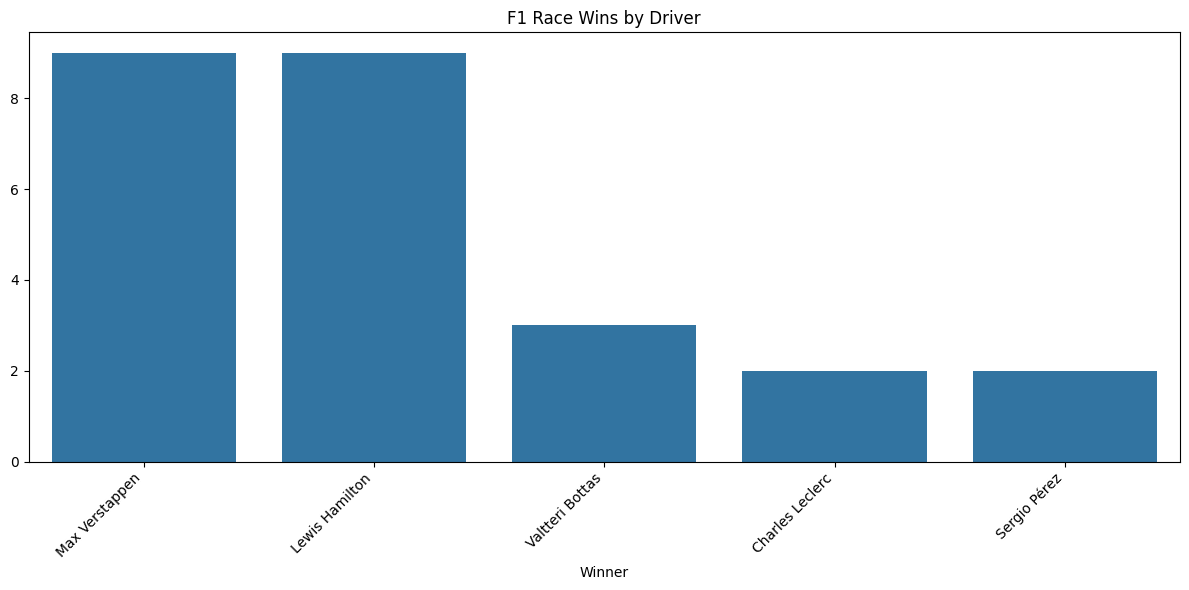

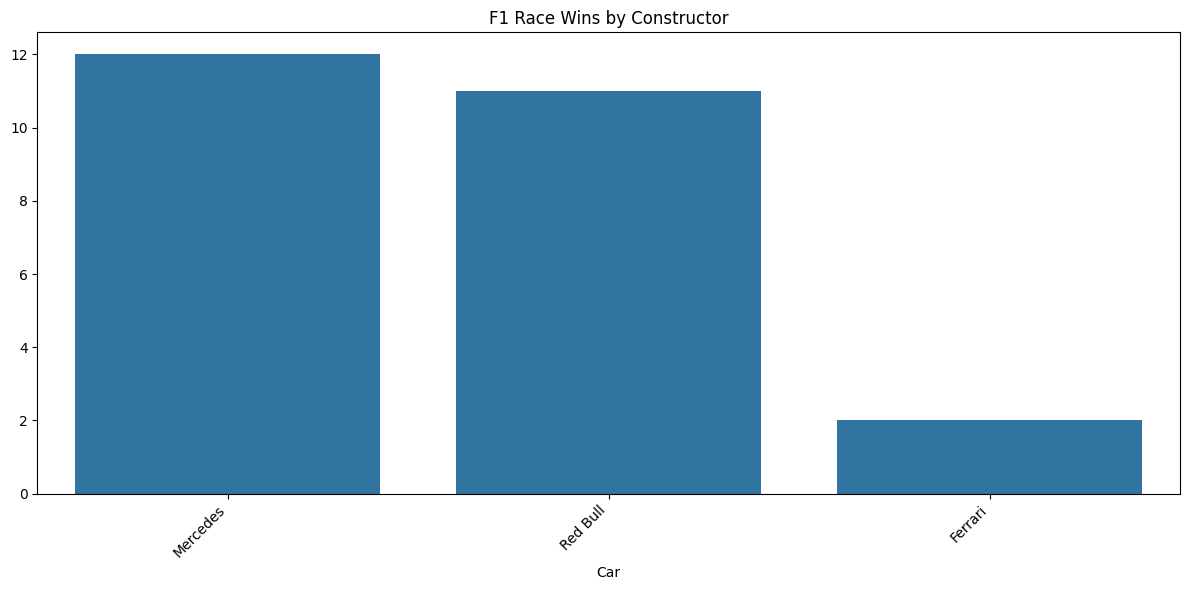

<Figure size 1400x800 with 0 Axes>

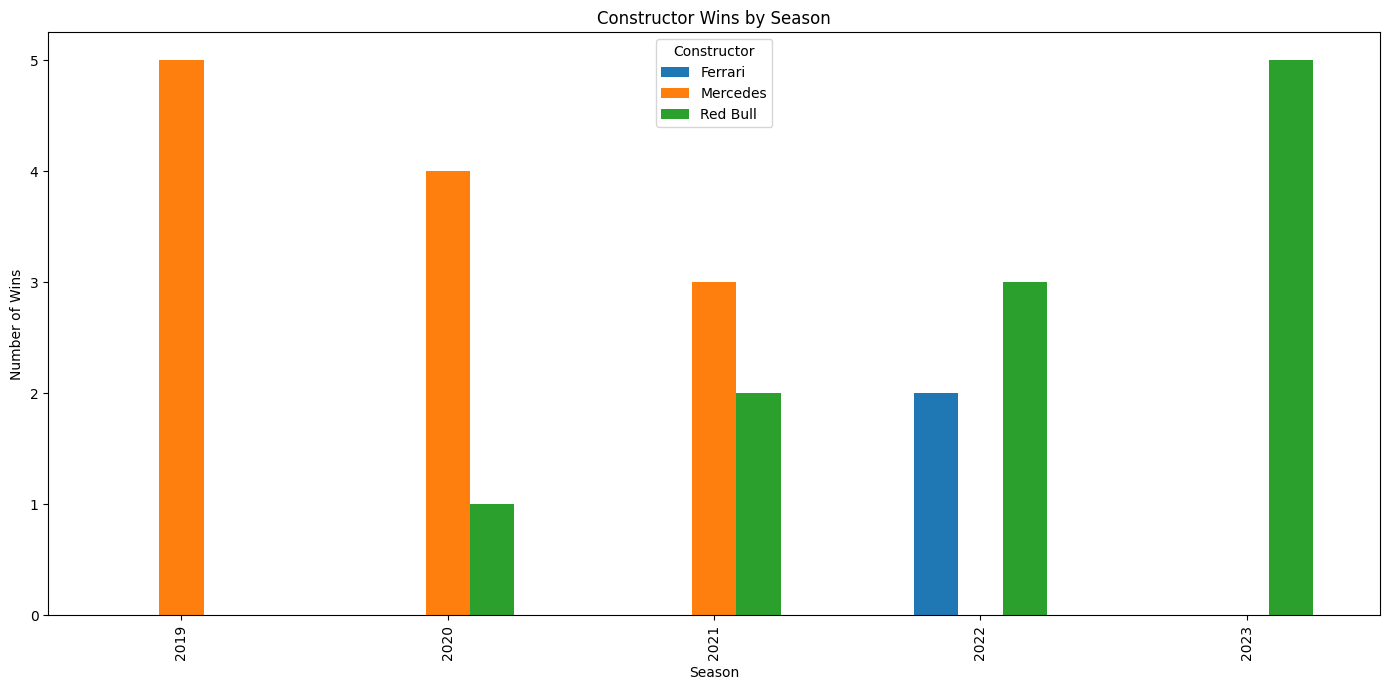

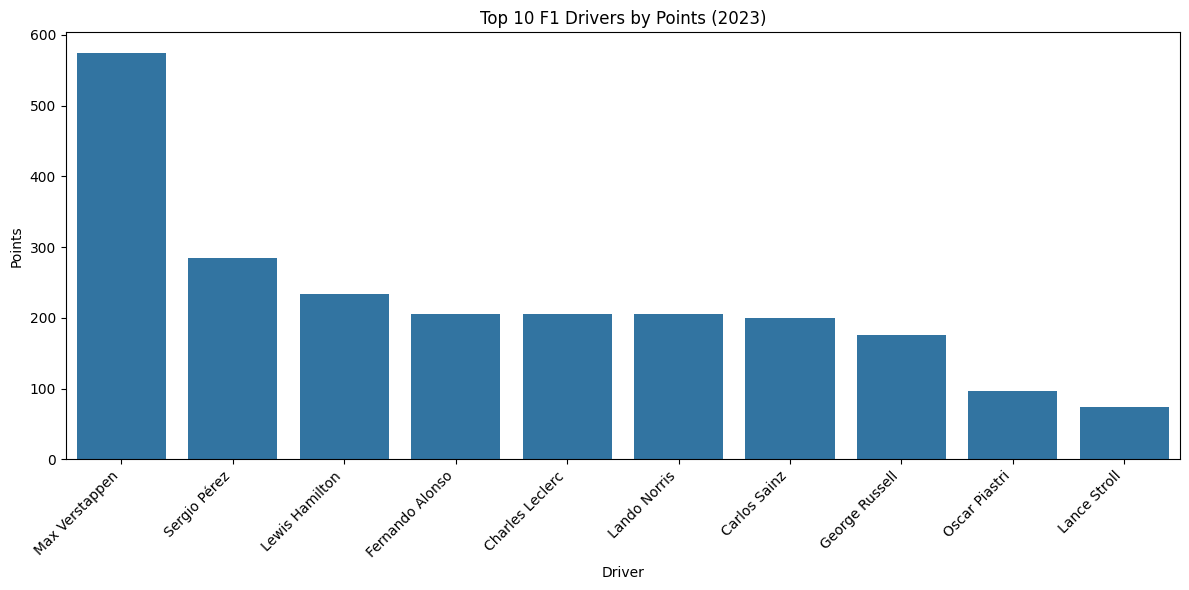

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

def fetch_f1_race_results(year, round_num=None):
    """
    Fetch Formula 1 race results for a specific year using the Ergast API.
    
    Args:
        year (int): The F1 season year
        round_num (int, optional): Specific race round number. If None, fetches all races.
        
    Returns:
        DataFrame: Pandas DataFrame with race results
    """
    base_url = "http://ergast.com/api/f1"
    
    if round_num:
        url = f"{base_url}/{year}/{round_num}/results.json"
    else:
        url = f"{base_url}/{year}/results.json?limit=1000"
    
    response = requests.get(url)
    
    if response.status_code != 200:
        print(f"Failed to fetch data: {response.status_code}")
        return None
    
    data = response.json()
    races = data['MRData']['RaceTable']['Races']
    
    results = []
    
    for race in races:
        grand_prix = race['raceName']
        date = race['date']
        circuit = race['Circuit']['circuitName']
        
        for result in race['Results']:
            if int(result['position']) == 1: 
                driver_name = f"{result['Driver']['givenName']} {result['Driver']['familyName']}"
                constructor = result['Constructor']['name']
                laps = result['laps']
                time = result.get('Time', {}).get('time', "")
                
                results.append({
                    'Grand Prix': grand_prix,
                    'Circuit': circuit,
                    'Date': date,
                    'Winner': driver_name,
                    'Car': constructor,
                    'Laps': laps,
                    'Time': time
                })
    
    return pd.DataFrame(results)

def fetch_multiple_seasons(seasons):
    """
    Fetch F1 data for multiple seasons
    
    Args:
        seasons (list): List of years to fetch
        
    Returns:
        DataFrame: Combined data from all seasons
    """
    all_results = []
    
    for year in seasons:
        print(f"Fetching data for {year} season...")
        season_data = fetch_f1_race_results(year)
        if season_data is not None and not season_data.empty:
            season_data['Season'] = year
            all_results.append(season_data)
    
    if all_results:
        return pd.concat(all_results, ignore_index=True)
    else:
        return None

def analyze_f1_data(df):
    """
    Perform basic analysis on F1 race data
    
    Args:
        df (DataFrame): Pandas DataFrame with F1 race results
    """

    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year
    
    df['Laps'] = pd.to_numeric(df['Laps'])
    
    driver_wins = df['Winner'].value_counts().head(10)
    print("Top 10 Winners:")
    print(driver_wins)
    
    constructor_wins = df['Car'].value_counts().head(10)
    print("\nTop 10 Constructors by Wins:")
    print(constructor_wins)
    
    # Wins by season for top constructors
    top_constructors = constructor_wins.index[:5]
    constructor_by_season = df[df['Car'].isin(top_constructors)]
    pivot = pd.crosstab(constructor_by_season['Season'], constructor_by_season['Car'])
    
    # Create visualizations
    plt.figure(figsize=(12, 6))
    sns.barplot(x=driver_wins.index, y=driver_wins.values)
    plt.title('F1 Race Wins by Driver')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('driver_wins.png')
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=constructor_wins.index, y=constructor_wins.values)
    plt.title('F1 Race Wins by Constructor')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('constructor_wins.png')
    
    # Plot constructor wins by season
    plt.figure(figsize=(14, 8))
    pivot.plot(kind='bar', stacked=False, figsize=(14, 7))
    plt.title('Constructor Wins by Season')
    plt.xlabel('Season')
    plt.ylabel('Number of Wins')
    plt.legend(title='Constructor')
    plt.tight_layout()
    plt.savefig('constructor_wins_by_season.png')
    
    return df

def fetch_driver_standings(year):
    """
    Fetch driver standings for a season
    
    Args:
        year (int): The F1 season year
        
    Returns:
        DataFrame: Driver standings
    """
    url = f"http://ergast.com/api/f1/{year}/driverStandings.json"
    response = requests.get(url)
    
    if response.status_code != 200:
        print(f"Failed to fetch driver standings: {response.status_code}")
        return None
    
    data = response.json()
    standings_lists = data['MRData']['StandingsTable']['StandingsLists']
    
    if not standings_lists:
        print(f"No standings data available for {year}")
        return None
    
    drivers = []
    
    for driver_standing in standings_lists[0]['DriverStandings']:
        position = driver_standing['position']
        points = driver_standing['points']
        wins = driver_standing['wins']
        driver_name = f"{driver_standing['Driver']['givenName']} {driver_standing['Driver']['familyName']}"
        constructor = driver_standing['Constructors'][0]['name'] if driver_standing['Constructors'] else ""
        
        drivers.append({
            'Position': int(position),
            'Driver': driver_name,
            'Constructor': constructor,
            'Points': float(points),
            'Wins': int(wins)
        })
    
    return pd.DataFrame(drivers)

def main():
    # Define seasons to analyze
    seasons = [2023, 2022, 2021, 2020, 2019]
    
    # Fetch race results
    print("Fetching race results data...")
    race_results = fetch_multiple_seasons(seasons)
    
    if race_results is not None:
        # Save to CSV
        race_results.to_csv('f1_race_results.csv', index=False)
        print(f"Saved race results to f1_race_results.csv with {len(race_results)} races")
        
        # Analyze data
        analyzed_data = analyze_f1_data(race_results)
        
        # Show some statistics
        print("\nStatistics by Season:")
        season_stats = analyzed_data.groupby('Season').agg(
            Races=('Grand Prix', 'count'),
            UniqueWinners=('Winner', 'nunique'),
            UniqueConstructors=('Car', 'nunique'),
            AvgLaps=('Laps', 'mean')
        )
        print(season_stats)
        
        # Get most recent season's driver standings
        most_recent = max(seasons)
        print(f"\nFetching driver standings for {most_recent}...")
        standings = fetch_driver_standings(most_recent)
        
        if standings is not None:
            # Save standings to CSV
            standings.to_csv(f'f1_driver_standings_{most_recent}.csv', index=False)
            print(f"Saved driver standings to f1_driver_standings_{most_recent}.csv")
            
            # Display top 5 drivers
            print(f"\nTop 5 Drivers for {most_recent}:")
            print(standings.head())
            
            # Plot points distribution
            plt.figure(figsize=(12, 6))
            sns.barplot(x='Driver', y='Points', data=standings.head(10))
            plt.title(f'Top 10 F1 Drivers by Points ({most_recent})')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.savefig('driver_points.png')
    else:
        print("No data was collected")

if __name__ == "__main__":
    main()